In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [2]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [3]:
from scipy.integrate import romb
from scipy.integrate import simps

In [2]:
def setvisible(self,vis):
    for c in self.collections: c.set_visible(vis)
def setanimated(self,ani):
    for c in self.collections: c.set_animated(ani)

In [3]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [4]:
filepath = "/lustre/scratch4/turquoise/giannis_kx/pixie3d/iter/int_kink/11/300x-ltw/pixie3d-300x-ltw.scratch/"

In [5]:
pxr.pixieload(filepath + "pixie3d.h5")

timesteps= 473
Dictionary of terms:
Variables: ['Car_variables', 'Cnv_variables', 'Cov_variables', 'Diagnostics', 'Perturbations', 'cells', 'nodes']
Cartesian: ['Bx', 'By', 'Bz', 'Jx', 'Jy', 'Jz', 'Te', 'Ve_1', 'Ve_2', 'Ve_3', 'Vx', 'Vy', 'Vz', 'rho']
Contravariant: ['B^1', 'B^2', 'B^3', 'J*P^2', 'J^1', 'J^2', 'J^3', 'JxRho', 'JxTe', 'P^1', 'P^3']
Covariant: ['B_1', 'B_2', 'B_3', 'J_1', 'J_2', 'J_3', 'T=Te+Ti', 'V_1', 'V_2', 'V_3', 'rho']
Diagnostic: ['E_1', 'E_2', 'E_3', 'F_1', 'F_2', 'F_3', 'Int. heat src', 'Poloidal flux', 'chi par', 'chi perp', 'diff', 'eta', 'h_eta', 'lambda', 'local div(B)', 'local div(J)', 'local div(V)', 'nu', 'pi+pe', 'q factor', '|J|']
Perturbations: ['B^1_pert', 'B^2_pert', 'B^3_pert', 'P^1_pert', 'P^2_pert', 'P^3_pert', 'Rho_pert', 'Te_pert']
Cell: ['X', 'Y', 'Z']
Node: ['X', 'Y', 'Z']


In [18]:
J3_0 = pxr.load_array(2,5,0,1)
J3_1 = pxr.load_array(2,5,100,101)
J3_2 = pxr.load_array(2,5,150,151)
J3_3 = pxr.load_array(2,5,200,201)
J3_4 = pxr.load_array(2,5,250,251)
J3_5 = pxr.load_array(2,5,300,301)
J3_6 = pxr.load_array(2,5,450,451)

In [19]:
J3_0_tor = np.mean(J3_0,axis=2)
J3_1_tor = np.mean(J3_1,axis=2)
J3_2_tor = np.mean(J3_2,axis=2)
J3_3_tor = np.mean(J3_3,axis=2)
J3_4_tor = np.mean(J3_4,axis=2)
J3_5_tor = np.mean(J3_5,axis=2)
J3_6_tor = np.mean(J3_6,axis=2)

In [20]:
rho_0 = pxr.load_array(0,13,0,1)
rho_1 = pxr.load_array(0,13,100,101)
rho_2 = pxr.load_array(0,13,150,151)
rho_3 = pxr.load_array(0,13,200,201)
rho_4 = pxr.load_array(0,13,250,251)
rho_5 = pxr.load_array(0,13,300,301)
rho_6 = pxr.load_array(0,13,450,451)

In [21]:
rho_0_tor = np.mean(rho_0,axis=2)
rho_1_tor = np.mean(rho_1,axis=2)
rho_2_tor = np.mean(rho_2,axis=2)
rho_3_tor = np.mean(rho_3,axis=2)
rho_4_tor = np.mean(rho_4,axis=2)
rho_5_tor = np.mean(rho_5,axis=2)
rho_6_tor = np.mean(rho_6,axis=2)

In [22]:
Te_0 = pxr.load_array(0,6,0,1)
Te_1 = pxr.load_array(0,6,100,101)
Te_2 = pxr.load_array(0,6,150,151)
Te_3 = pxr.load_array(0,6,200,201)
Te_4 = pxr.load_array(0,6,250,251)
Te_5 = pxr.load_array(0,6,300,301)
Te_6 = pxr.load_array(0,6,450,451)

In [23]:
Te_0_tor = np.mean(Te_0,axis=2)
Te_1_tor = np.mean(Te_1,axis=2)
Te_2_tor = np.mean(Te_2,axis=2)
Te_3_tor = np.mean(Te_3,axis=2)
Te_4_tor = np.mean(Te_4,axis=2)
Te_5_tor = np.mean(Te_5,axis=2)
Te_6_tor = np.mean(Te_6,axis=2)

In [24]:
P0 = np.multiply(rho_0,Te_0)
P1 = np.multiply(rho_1,Te_1)
P2 = np.multiply(rho_2,Te_2)
P3 = np.multiply(rho_3,Te_3)
P4 = np.multiply(rho_4,Te_4)
P5 = np.multiply(rho_5,Te_5)
P6 = np.multiply(rho_6,Te_6)

In [25]:
P0_tor = np.multiply(rho_0_tor,Te_0_tor)
P1_tor = np.multiply(rho_1_tor,Te_1_tor)
P2_tor = np.multiply(rho_2_tor,Te_2_tor)
P3_tor = np.multiply(rho_3_tor,Te_3_tor)
P4_tor = np.multiply(rho_4_tor,Te_4_tor)
P5_tor = np.multiply(rho_5_tor,Te_5_tor)
P6_tor = np.multiply(rho_6_tor,Te_6_tor)

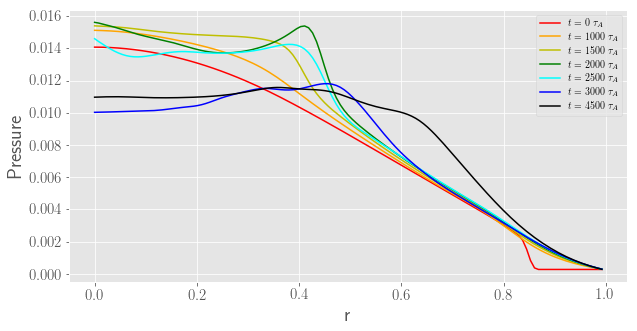

In [26]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P0[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P1[:,0,0],"orange",label=r"$t=1000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P2[:,0,0],"y",label=r"$t=1500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P3[:,0,0],"g",label=r"$t=2000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P4[:,0,0],"cyan",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P5[:,0,0],"b",label=r"$t=3000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], P6[:,0,0],"k",label=r"$t=4500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel("Pressure")
plt.show()

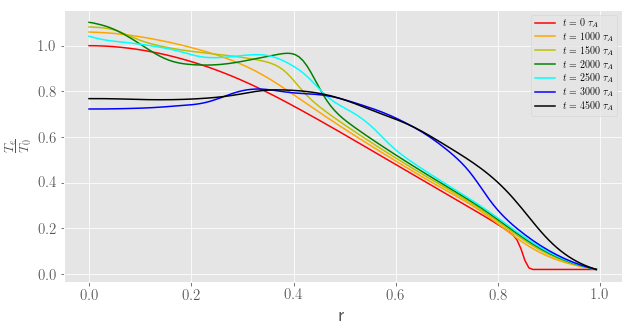

In [27]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_0_tor[:,0,0]],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_1_tor[:,0,0]],"orange",label=r"$t=1000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_2_tor[:,0,0]],"y",label=r"$t=1500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_3_tor[:,0,0]],"g",label=r"$t=2000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_4_tor[:,0,0]],"cyan",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_5_tor[:,0,0]],"b",label=r"$t=3000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], [x/Te_0_tor[0,0,0] for x in Te_6_tor[:,0,0]],"k",label=r"$t=4500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\frac{T_e}{T_0}$")
plt.show()

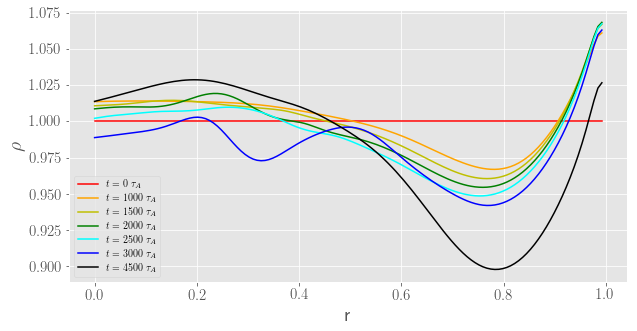

In [28]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_0_tor[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_1_tor[:,0,0],"orange",label=r"$t=1000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_2_tor[:,0,0],"y",label=r"$t=1500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_3_tor[:,0,0],"g",label=r"$t=2000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_4_tor[:,0,0],"cyan",label=r"$t=2500\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_5_tor[:,0,0],"b",label=r"$t=3000\;\tau_A$")
plt.plot([x/P0.shape[0] for x in range(P0.shape[0])], rho_6_tor[:,0,0],"k",label=r"$t=4500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$\rho$")
plt.show()

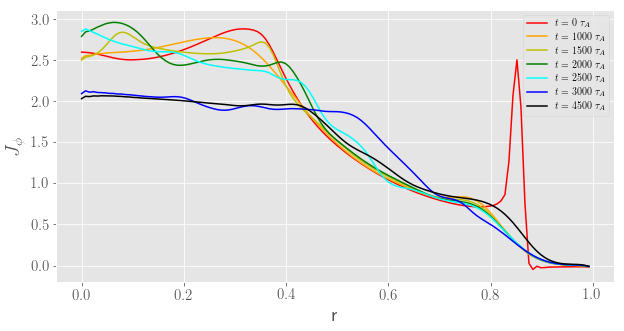

In [29]:
fig = plt.figure(figsize=(10,5))
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_0_tor[:,0,0],"r",label=r"$t=0\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_1_tor[:,0,0],"orange",label=r"$t=1000\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_2_tor[:,0,0],"y",label=r"$t=1500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_3_tor[:,0,0],"g",label=r"$t=2000\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_4_tor[:,0,0],"cyan",label=r"$t=2500\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_5_tor[:,0,0],"b",label=r"$t=3000\;\tau_A$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], -J3_6_tor[:,0,0],"k",label=r"$t=4500\;\tau_A$")
plt.legend()
plt.xlabel("r")
plt.ylabel(r"$J_{\phi}$")
plt.show()

# Fourier modes - toroidal

In [32]:
B1 = pxr.load_array(1,0,0,210)
V_1 = pxr.load_array(2,7,0,210)

In [33]:
time = [x*10 for x in range(0,B1.shape[3])]

In [34]:
B1_tor = np.mean(B1, axis=2)
V_1_tor = np.mean(V_1,axis=2)

In [35]:
dB1 = B1-B1_tor[:,:,np.newaxis,:]
dV_1 = V_1-V_1_tor[:,:,np.newaxis,:]

In [36]:
db1w = np.fft.fft(dB1,axis=2)
dv_1w = np.fft.fft(dV_1,axis=2)

In [37]:
db1wrt = []
for r_ind in range(db1w.shape[0]):
    for n_ind in range(db1w.shape[2]):
        for t_ind in range(db1w.shape[3]):
            db1wrt.append(simps(db1w[r_ind,:,n_ind,t_ind],dx=2*np.pi/(db1w.shape[1]-1)))

In [38]:
db1wrt = np.reshape(db1wrt,(db1w.shape[0],db1w.shape[2],db1w.shape[3]))

In [39]:
db1wt = []
for n_ind in range(db1w.shape[2]):
    for t_ind in range(db1w.shape[3]):
        db1wt.append(simps(db1wrt[:,n_ind,t_ind],dx=1/(db1w.shape[0]-1)))

In [40]:
db1wt = np.reshape(db1wt,(db1w.shape[2],db1w.shape[3]))

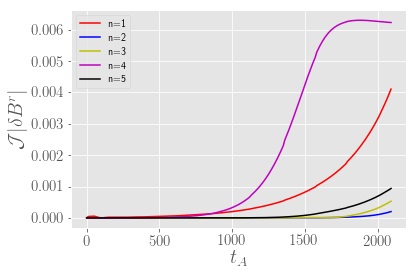

In [41]:
plt.plot(time,np.abs(db1wt[1,:]),"r",label="n=1")
plt.plot(time,np.abs(db1wt[2,:]),"b",label="n=2")
plt.plot(time,np.abs(db1wt[3,:]),"y",label="n=3")
plt.plot(time,np.abs(db1wt[4,:]),"m",label="n=4")
plt.plot(time,np.abs(db1wt[5,:]),"k",label="n=5")
plt.xlabel("$t_A$")
plt.ylabel("$\mathcal{J}|\delta B^r|$")
plt.legend()
plt.show()

In [42]:
dv_1wrt = []
for r_ind in range(dv_1w.shape[0]):
    for n_ind in range(dv_1w.shape[2]):
        for t_ind in range(dv_1w.shape[3]):
            dv_1wrt.append(simps(dv_1w[r_ind,:,n_ind,t_ind],dx=2*np.pi/(dv_1w.shape[1]-1)))

In [43]:
dv_1wrt = np.reshape(dv_1wrt,(dv_1w.shape[0],dv_1w.shape[2],dv_1w.shape[3]))

In [44]:
dv_1wt = []
for n_ind in range(dv_1w.shape[2]):
    for t_ind in range(dv_1w.shape[3]):
        dv_1wt.append(simps(dv_1wrt[:,n_ind,t_ind],dx=1/(dv_1w.shape[0]-1)))

In [45]:
dv_1wt = np.reshape(dv_1wt,(dv_1w.shape[2],dv_1w.shape[3]))

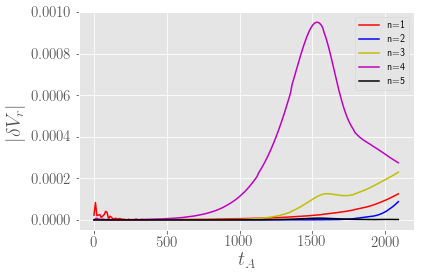

In [46]:
plt.plot(time,np.abs(dv_1wt[1,:]),"r",label="n=1")
plt.plot(time,np.abs(dv_1wt[2,:]),"b",label="n=2")
plt.plot(time,np.abs(dv_1wt[3,:]),"y",label="n=3")
plt.plot(time,np.abs(dv_1wt[4,:]),"m",label="n=4")
plt.plot(time,np.abs(dv_1wt[5,:]),"k",label="n=5")
plt.xlabel("$t_A$")
plt.ylabel("$|\delta V_r|$")
plt.legend()
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


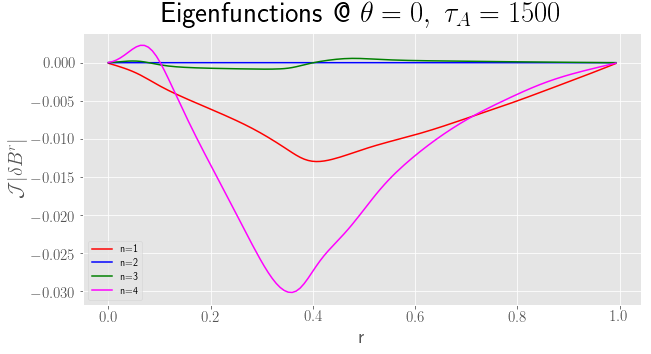

In [53]:
plt.figure(figsize=(10,5))
plt.title(r"Eigenfunctions @ $\theta = 0,\; \tau_A = 1500$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], db1w[:,0,1,150],"r",label="n=1")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], db1w[:,0,2,150],"b",label="n=2")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], db1w[:,0,3,150],"g",label="n=3")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], db1w[:,0,4,150],"magenta",label="n=4")
plt.legend()
plt.xlabel("r")
plt.ylabel("$\mathcal{J}|\delta B^r|$")
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


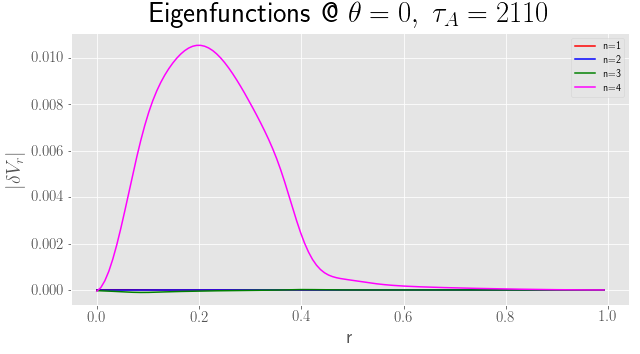

In [54]:
plt.figure(figsize=(10,5))
plt.title(r"Eigenfunctions @ $\theta = 0,\; \tau_A = 2110$")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], dv_1w[:,0,1,150],"r",label="n=1")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], dv_1w[:,0,2,150],"b",label="n=2")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], dv_1w[:,0,3,150],"g",label="n=3")
plt.plot([x/J3_0.shape[0] for x in range(J3_0.shape[0])], dv_1w[:,0,4,150],"magenta",label="n=4")
plt.legend()
plt.xlabel("r")
plt.ylabel("$|\delta V_r|$")
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/ma/core.py:2809: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


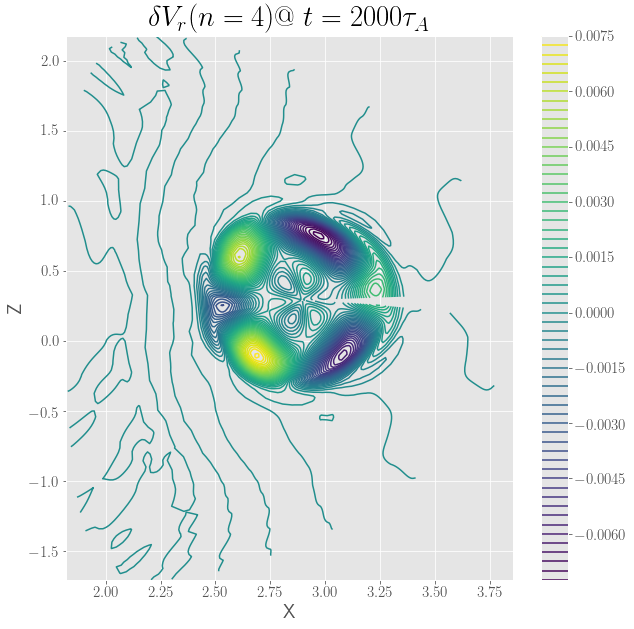

In [63]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$\delta V_r(n=4) @\; t=2000 \tau_{A}$")
plt.contour(pxr.Xc[:,:,0],pxr.Zc[:,:,0],dv_1w[:,:,4,200],60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/ma/core.py:2809: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


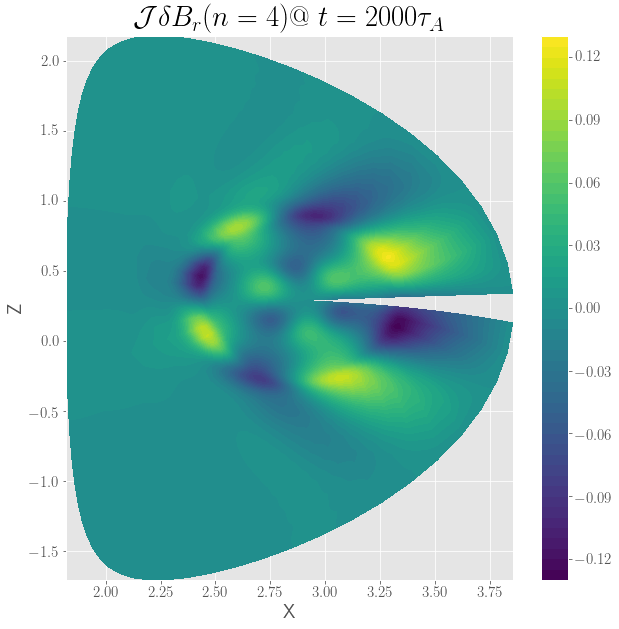

In [102]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$\mathcal{J} \delta B_r(n=4) @\; t=2000 \tau_{A}$")
plt.contourf(pxr.Xc[:,:,0],pxr.Zc[:,:,0],db1w[:,:,4,200],60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()

In [64]:
dJ3_1500 = J3_2-J3_2_tor[:,:,np.newaxis,:]
dJ3_2000 = J3_3-J3_3_tor[:,:,np.newaxis,:]
dP2 = P2 - P2_tor[:,:,np.newaxis,:]
dP3 = P3 - P3_tor[:,:,np.newaxis,:]

In [65]:
dj3_1500w = np.fft.fft(dJ3_1500,axis=2)
dj3_2000w = np.fft.fft(dJ3_2000,axis=2)
dp2w = np.fft.fft(dP2,axis=2)
dp3w = np.fft.fft(dP3,axis=2)

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/ma/core.py:2809: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


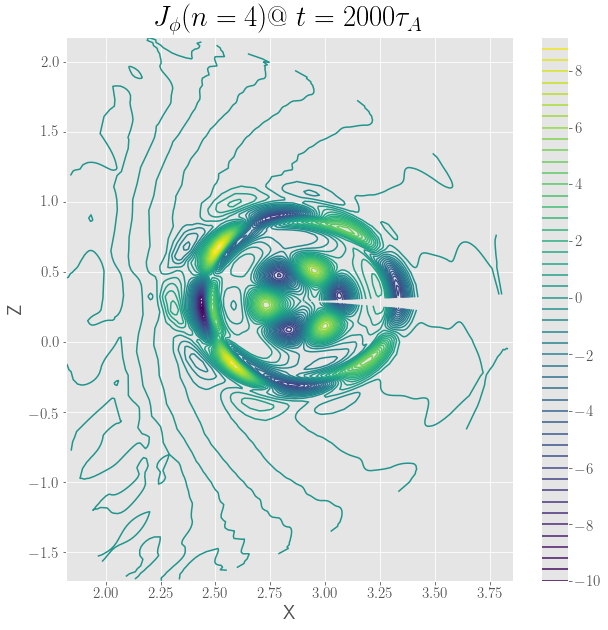

In [74]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$J_{\phi}(n=4) @\; t=2000 \tau_{A}$")
plt.contour(pxr.Xc[:,:,0],pxr.Zc[:,:,0],dj3_2000w[:,:,4,-1],60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/ma/core.py:2809: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


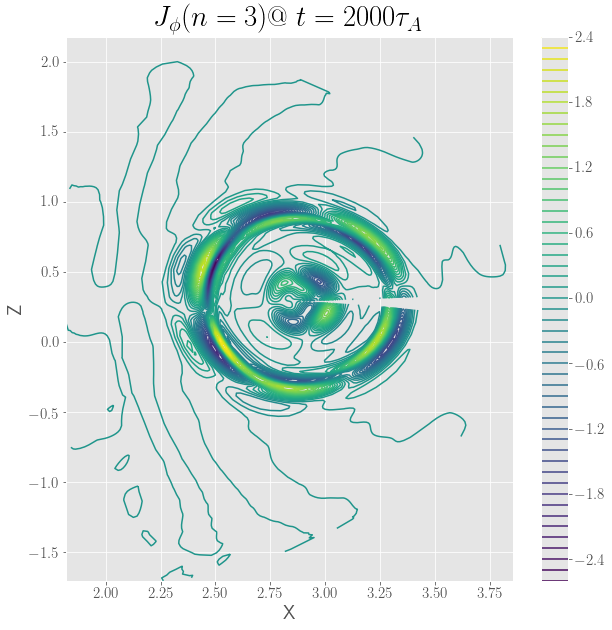

In [89]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$J_{\phi}(n=3) @\; t=2000 \tau_{A}$")
plt.contour(pxr.Xc[:,:,0],pxr.Zc[:,:,0],dj3_2000w[:,:,3,-1],60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/numpy/ma/core.py:2809: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


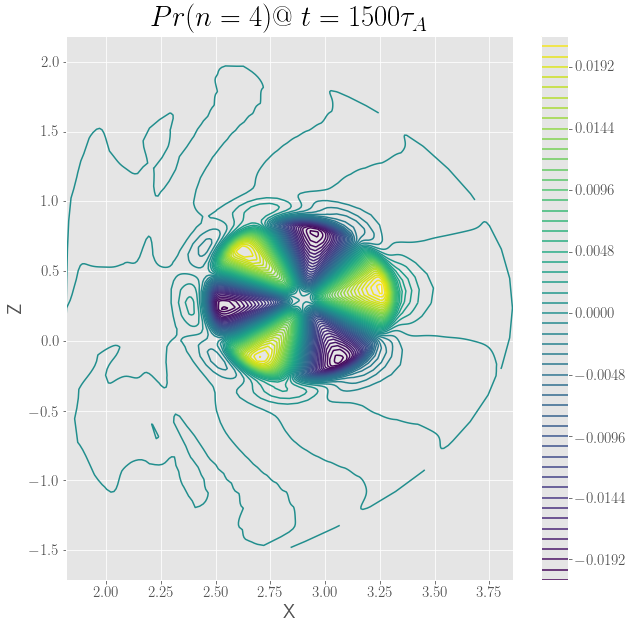

In [92]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$Pr(n=4) @\; t=1500 \tau_{A}$")
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],dp2w[:,:,4,-1],60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()

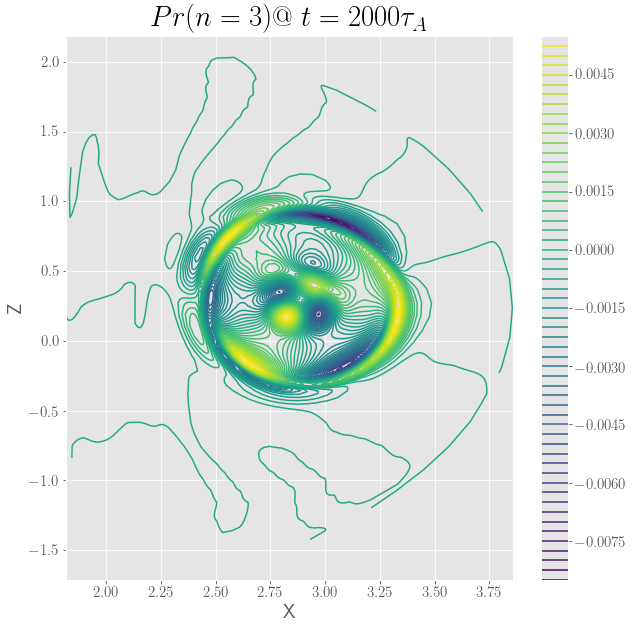

In [93]:
fig = plt.figure(figsize=(10,10))
plt.title(r"$Pr(n=3) @\; t=2000 \tau_{A}$")
plt.contour(pxr.X[:,:,0],pxr.Z[:,:,0],np.real(dp2w[:,:,3,-1]),60)
plt.xlabel("X")
plt.ylabel("Z")
plt.colorbar()
plt.show()